In [91]:
import torch
import torch.nn.functional as F

In [92]:
import matplotlib.pyplot as plt

def heatmap(title, pixels):
    plt.imshow(pixels, cmap="gray"); plt.colorbar(); plt.grid(visible=False)
    plt.title(title)
    plt.show()

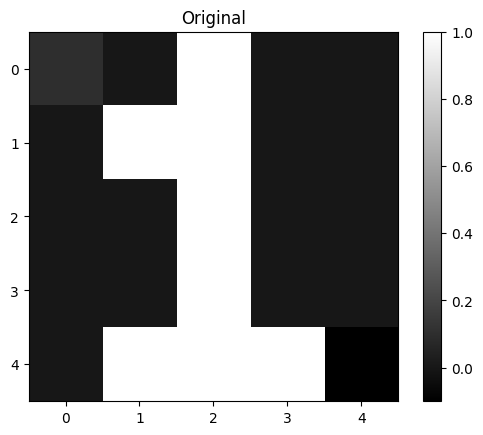

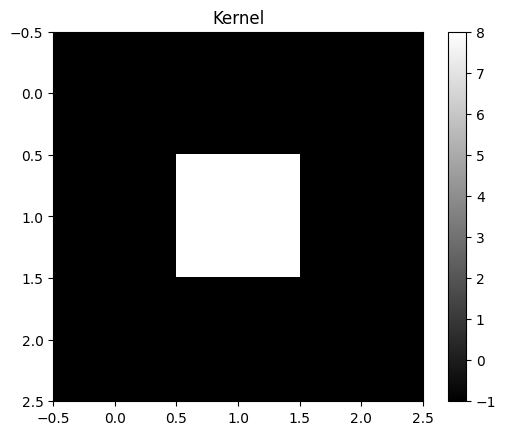

In [93]:
image = [
    [0.1, 0, 1, 0, 0],
    [0, 1, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 1, 1, 1, -0.1],
]

# See what this does at https://www.shadertoy.com/view/XcS3RD
kernel = [
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
]

heatmap("Original", image)
heatmap("Kernel", kernel)

In [94]:
# 1. Caveman convolution

image_height = len(image)
image_width = len(image[0])
kernel_height = len(kernel)
kernel_width = len(kernel[0])

pad_height = (kernel_height - 1) // 2
pad_width = (kernel_width - 1) // 2

# There are a few ways to handle the corners, in this case we are padding the image 
padded_image = [[0] * (image_width + 2 * pad_width) for _ in range(image_height + 2 * pad_height)]
for i in range(image_height):
    for j in range(image_width):
        padded_image[i + pad_height][j + pad_width] = image[i][j]

# glide kernel on the padded image and sum all element-wise products
output = [[0 for _ in range(image_width)] for _ in range(image_height)]
for i in range(image_height):
    for j in range(image_width):
        s = 0
        for ki in range(kernel_height):
            for kj in range(kernel_width):
                s += padded_image[i + ki][j + kj] * kernel[ki][kj]
        output[i][j] = s

# For example, at the center of the image we have...
# 1 1 0
# 0 1 0
# 0 1 0
# Which gives... -1*1 + -1*1 + -1*0 + -1 * 0 + 8 * 1 + -1 * 0 + -1 * 0 + -1 * 1 + -1 * 0 = 5

output

[[-0.19999999999999996, -3.1, 6, -2, 0],
 [-1.1, 4.9, 5, -3, 0],
 [-1, -4, 5, -3, 0],
 [-1, -4, 4, -3.9, -0.9],
 [-1, 6, 5, 6.1, -1.8]]

In [ ]:
# 2. Using PyTorch's functional (we will be using this for the sake of efficiency)

image_tensor = torch.tensor(image, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # + Lift with batch then channel dim
kernel_tensor = torch.tensor(kernel, dtype=torch.float32).unsqueeze(0).unsqueeze(0)  # + Lift with nb. kernel then channel dim
print(image_tensor.shape, kernel_tensor.shape)

output_tensor = F.conv2d(image_tensor, kernel_tensor, padding="same") # pad image => keep original image dim
output_tensor, output_tensor.shape


torch.Size([1, 1, 5, 5]) torch.Size([1, 1, 3, 3])


(tensor([[[[-0.2000, -3.1000,  6.0000, -2.0000,  0.0000],
           [-1.1000,  4.9000,  5.0000, -3.0000,  0.0000],
           [-1.0000, -4.0000,  5.0000, -3.0000,  0.0000],
           [-1.0000, -4.0000,  4.0000, -3.9000, -0.9000],
           [-1.0000,  6.0000,  5.0000,  6.1000, -1.8000]]]]),
 torch.Size([1, 1, 5, 5]))

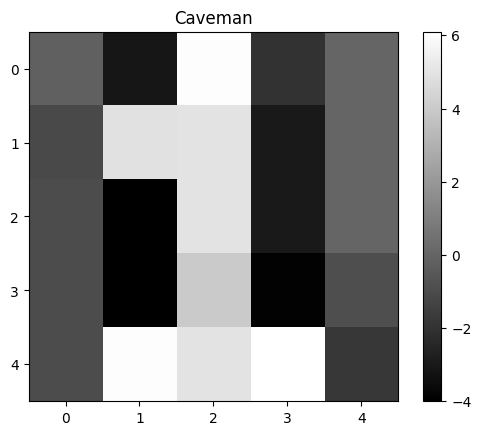

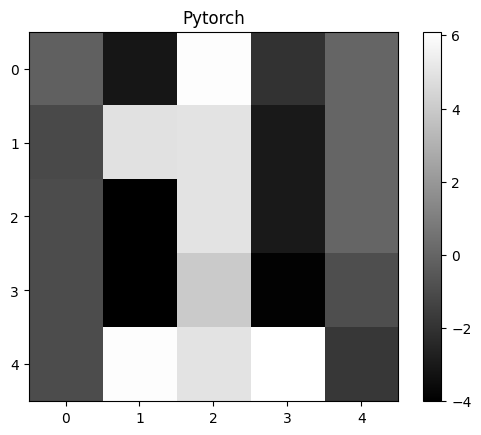

In [90]:
heatmap("Caveman", output)
heatmap("Pytorch", output_tensor.squeeze())